In [1]:
from sklearn import datasets
import json
from openTSNE import TSNE
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
import umap

In [3]:
iris = datasets.load_iris()
x, y = iris["data"], iris["target"]

# embedding = TSNE().fit(x)

In [4]:
reducer = umap.UMAP(random_state=42)
reducer.fit(x)

embedding = reducer.transform(x)

In [5]:
data = pd.DataFrame(embedding, columns=["Comp1","Comp2"])
data["Label"] = y

In [6]:
# TODO add the Target Information into  your json file
with open('umap.json', 'w') as f:
    json.dump(np.array(embedding).tolist(), f)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(43.64620833333335, 0.5, 'Comp 2')

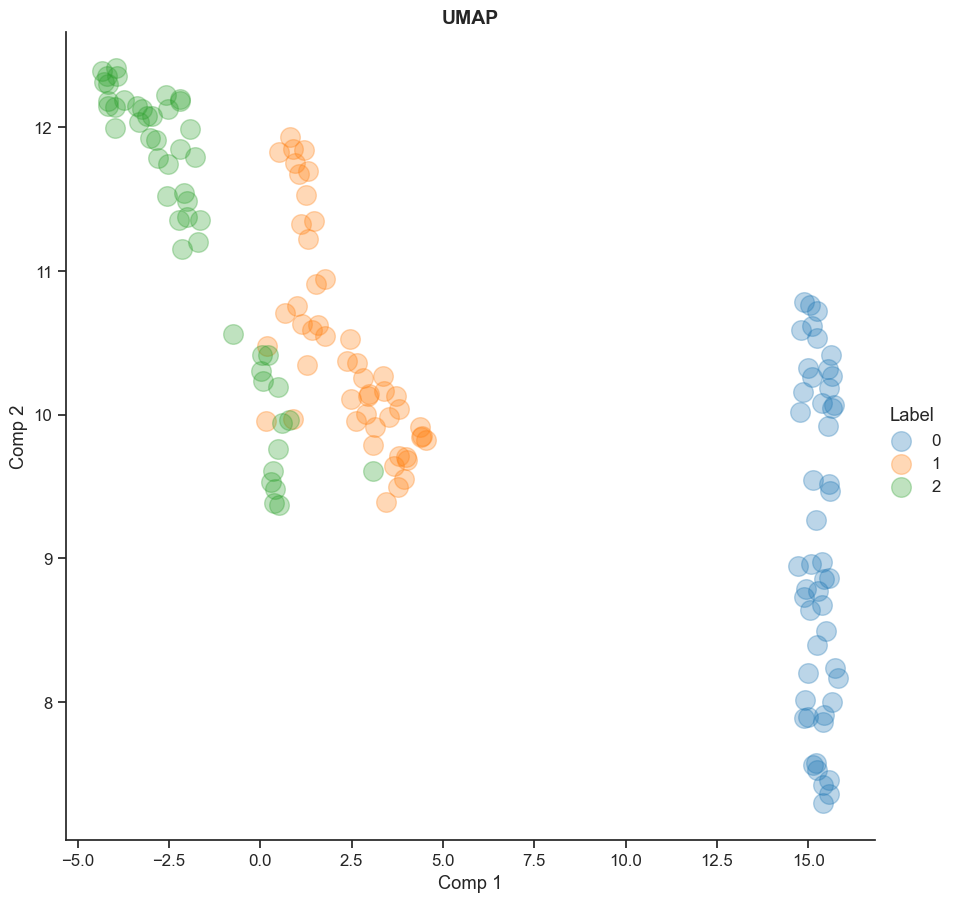

In [7]:
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

sns.lmplot(x='Comp1',
           y='Comp2',
           data=data,
           fit_reg=False,
           legend=True,
           size=9,
           hue='Label',
           scatter_kws={"s":200, "alpha":0.3}
          )

plt.title("UMAP", weight='bold').set_fontsize('14')
plt.xlabel('Comp 1')
plt.ylabel('Comp 2')